<a href="https://colab.research.google.com/github/tutalae/BTC/blob/master/Hurst_Exponent_to_analyse_the_Stock_and_Crypto_market_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Hurst Exponent
The Hurst exponent or also denoted by the letter ‘H’ is a measure of long-term memory of a time series where we measure the amount by which a given time series deviates from a random walk. The scalar value shows the relative tendency of a time series to cluster in a particular direction (trending pattern in both positive and negative manner) or regressing strongly to the mean (mean-reverting pattern).

The various values of the Hurst exponent always range between 0 and 1 and based on the value of H we can classify the given time series as follows:


*   H < 0.5 – Mean-Reverting ( anti-persistent ) series.A closer value to 0 means that there is a strong pattern of the mean-reversion process. In practical situations, it means that a high value will be followed by a low value next and vice versa.
*   H = 0.5 – Geometric Random Walk . This means that it can go either way and there is no clear deduction possible from the given parameters
*   H > 0.5 – Trending (Persistent) series. A value that is more close to 1 means that the trending pattern is strong and the trend will continue. Generally, it means that a high value will be followed by a higher value.

from https://www.analyticsvidhya.com/blog/2021/06/using-hurst-exponent-to-analyse-the-stock-and-crypto-market-with-python/

In [2]:
pip install yfinance

     |████████████████████████████████| 6.3MB 4.4MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23455 sha256=16cc85ffd9fe8546d70c6c2f6fa7e077bfd3015a6ecf3deda53cdfc128cf7b8f
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
import yfinance as yf
import numpy as np
import pandas as pd

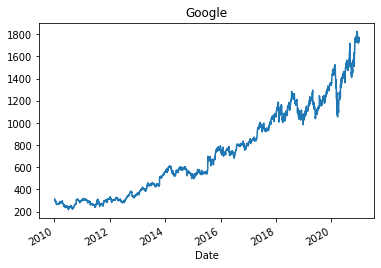

In [4]:
spy_df = yf.download("GOOGL", 

                     start="2010-01-01", 

                     end="2020-12-31", 

                     progress=False)

spy_df["Adj Close"].plot(title="Google");

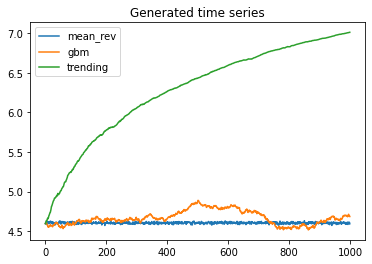

In [5]:
sample_size = 1000
scalar = 100
np.random.seed(123)
df = pd.DataFrame(data={"mean_rev": np.log(np.random.randn(sample_size) + scalar),
                        "gbm": np.log(np.cumsum(np.random.randn(sample_size)) + scalar),
                        "trending": np.log(np.cumsum(np.random.randn(sample_size) + 1) + scalar)})
df.plot(title="Generated time series")

In [6]:
def get_hurst_exponent(time_series, max_lag=20):
    """Returns the Hurst Exponent of the time series"""
    lags = range(2, max_lag)
    # variances of the lagged differences
    tau = [np.std(np.subtract(time_series[lag:], time_series[:-lag])) for lag in lags]
    # calculate the slope of the log plot -> the Hurst Exponent
    reg = np.polyfit(np.log(lags), np.log(tau), 1)
    return reg[0]

In [7]:
for lag in [5, 10, 20, 100, 300, 500, 1000, 2000, 2700]:
    hurst_exp = get_hurst_exponent(spy_df["Adj Close"].values, lag)
    print(f"Hurst exponent with {lag} lags: {hurst_exp:.4f}")

Hurst exponent with 5 lags: 0.4790
Hurst exponent with 10 lags: 0.4723
Hurst exponent with 20 lags: 0.4767
Hurst exponent with 100 lags: 0.3821
Hurst exponent with 300 lags: 0.2861
Hurst exponent with 500 lags: 0.2642
Hurst exponent with 1000 lags: 0.2399
Hurst exponent with 2000 lags: 0.2402
Hurst exponent with 2700 lags: 0.2211


the increase of the lag value, the mean-reversion is getting stronger as the value is decreasing towards 0.

In [9]:
for lag in [5, 10, 20, 100, 300, 500]:
    print(f"Hurst exponents with {lag} lags ----")
    for column in df.columns:
        print(f"{column}: {get_hurst_exponent(df.values, lag):.4f}")

Hurst exponents with 5 lags ----
mean_rev: 0.3282
gbm: 0.3282
trending: 0.3282
Hurst exponents with 10 lags ----
mean_rev: 0.4345
gbm: 0.4345
trending: 0.4345
Hurst exponents with 20 lags ----
mean_rev: 0.5488
gbm: 0.5488
trending: 0.5488
Hurst exponents with 100 lags ----
mean_rev: 0.7319
gbm: 0.7319
trending: 0.7319
Hurst exponents with 300 lags ----
mean_rev: 0.7712
gbm: 0.7712
trending: 0.7712
Hurst exponents with 500 lags ----
mean_rev: 0.7683
gbm: 0.7683
trending: 0.7683
